<a href="https://colab.research.google.com/github/trangdtk-vnu/car_insurance_prediction/blob/main/Trang_Data_Science_in_Action_2nd_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [81]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization
import numpy as np
from sklearn.impute import KNNImputer

# Goal #1: Data Exploration and Feature Engineering

## Load the dataset into a pandas DataFrame

In [82]:
#Download the dataset
file_id = '19P3Gj_VNapuM9xAAx0zMhsRO3JVytna2'
link = f'https://drive.google.com/uc?id={file_id}'
!gdown $link
!ls

Downloading...
From: https://drive.google.com/uc?id=19P3Gj_VNapuM9xAAx0zMhsRO3JVytna2
To: /content/Car_Insurance_Claim.csv
100% 1.27M/1.27M [00:00<00:00, 10.5MB/s]
Car_Insurance_Claim.csv  sample_data


In [83]:
file_path = 'Car_Insurance_Claim.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        se

## Data Exploration

In [84]:
print(df.dtypes) #check data type of variables

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object


In [85]:
#unique values of variables
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in ID: [569520 750365 199901 ... 468409 903459 442696]
Unique values in AGE: ['65+' '16-25' '26-39' '40-64']
Unique values in GENDER: ['female' 'male']
Unique values in RACE: ['majority' 'minority']
Unique values in DRIVING_EXPERIENCE: ['0-9y' '10-19y' '20-29y' '30y+']
Unique values in EDUCATION: ['high school' 'none' 'university']
Unique values in INCOME: ['upper class' 'poverty' 'working class' 'middle class']
Unique values in CREDIT_SCORE: [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
Unique values in VEHICLE_OWNERSHIP: [1. 0.]
Unique values in VEHICLE_YEAR: ['after 2015' 'before 2015']
Unique values in MARRIED: [0. 1.]
Unique values in CHILDREN: [1. 0.]
Unique values in POSTAL_CODE: [10238 32765 92101 21217]
Unique values in ANNUAL_MILEAGE: [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
Unique values in VEHICLE_TYPE: ['sedan' 'sports

### **Description of the dataset**

The Car_Insurance_Claim.csv dataset is about annual car insurance data.

# Dataset Features
*ID*

* Data Type: Integer

* Description: A unique identifier for each customer.

*AGE*

* Data Type: Object

* Description: The age of customer. Categorized as '65+', '16-25', '26-39' or '40-64'.

*GENDER*

* Data Type: Object

* Description: The gender of the customer. Typically categorized as 'Male' or 'Female'.

*RACE*

* Data Type: Object

* Description: The race of the car of customer. Categorized as 'majority' or 'minority'

*DRIVING_EXPERIENCE*

* Data Type: Object

* Description: Number of years of driving experience of customers. Categorized as '0-9y', '10-19y', '20-29y' or '30y+'.

*EDUCATION*

* Data Type: Object

* Description: The education level of customers. Categorized as 'high school', 'none' or 'university'.

*INCOME*

* Data Type: Object

* Description: Income of customers. Categorized as 'upper class', 'poverty', 'working class' or 'middle class'.

*CREDIT_SCORE*

* Data Type: float

* Description: The credit score of customers. The higher the score is the better.

*VEHICLE_OWNERSHIP*

* Data Type: float

* Description: If the customer owns a vehicles '1.0'; otherwise '0.0'.

*VEHICLE_YEAR*

* Data Type: Object

* Description: The year that customers own the vehicle. Categorized as 'after 2015' or 'before 2015'.

*MARRIED*

* Data Type: float

* Description: The married status of customers. Categorized as Yes - '1.0' and No - '0.0'

*CHILDREN*

* Data Type: float

* Description: If the customer have children '1.0'; otherwise '0.0'.

*POSTAL_CODE*

* Data Type: int

* Description: The postal code of customers.

*ANNUAL_MILEAGE*

* Data Type: float

* Description: Annual mileage refers to the average number of miles a car is driven in a year's time.

*VEHICLE_TYPE*

* Data Type: object

* Description: The type of the vehicle of customers. Categorized as 'sedan' or 'sports car'.

*SPEEDING_VIOLATIONS*

* Data Type: int

* Description: Number of times customers violate speeding laws.

*DUIS*

* Data Type: int

* Description: Number of times that customers Driving Under the Influence.

*PAST_ACCIDENTS*

* Data Type: int

* Description: Number of past accidents.

*OUTCOME*

* Data Type: float

* Description: Customers claim their car insurance '1.0' or not '0.0'

# General Context
Imagine you are working for a car insurance company that has shared its annual car insurance data.
As a data scientist, your task is to analyze the dataset and build a predictive model to understand customer behaviors. The ultimate goal is to predict whether a customer is likely to claim their car insurance (1) or not (0). This insight can help the company make informed risk assessment and customer engagement decisions.

In [86]:
# Descriptive statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


In [87]:
# Using info() to get the dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [88]:
# Using isnull().sum() to count missing values in each column
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [89]:
# Calculate the percentage of missing values for CREDIT_SCORE and ANNUAL_MILEAGE
missing_percentage_credit_score = (df['CREDIT_SCORE'].isnull().sum() / len(df['CREDIT_SCORE'])) * 100
missing_percentage_annual_mileage = (df['ANNUAL_MILEAGE'].isnull().sum() / len(df['ANNUAL_MILEAGE'])) * 100

# Print the results
print(f"Percentage of missing values for CREDIT_SCORE: {missing_percentage_credit_score:.2f}%")
print(f"Percentage of missing values for ANNUAL_MILEAGE: {missing_percentage_annual_mileage:.2f}%")

Percentage of missing values for CREDIT_SCORE: 9.82%
Percentage of missing values for ANNUAL_MILEAGE: 9.57%


We have missing values for 'CREDIT_SCORE' and "ANNUAL_MILEAGE'

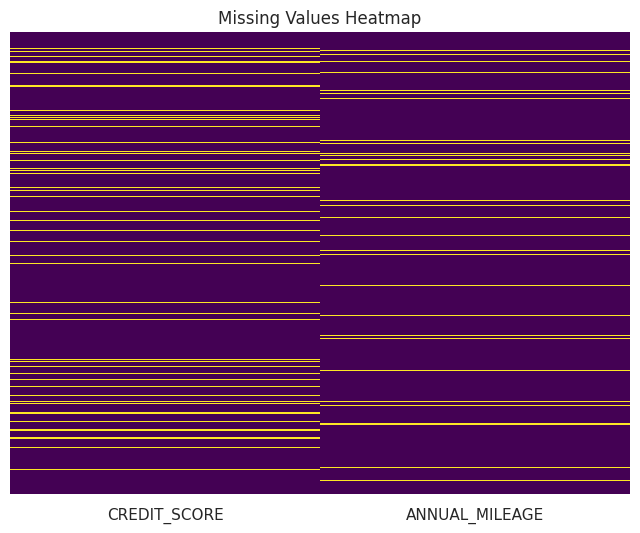

In [90]:
# Missing values heatmap for 'CREDIT_SCORE' and "ANNUAL_MILEAGE'
columns_to_check = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

# Create a DataFrame containing True for missing values and False for non-missing values
missing_values_df = df[columns_to_check].isnull()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(missing_values_df, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

It seems like missing values are randomly distributed and not systematic. We can keep observations with missing values.

### Visualizations

#### Unvariate Analysis

##### Analysis of Numerical Features

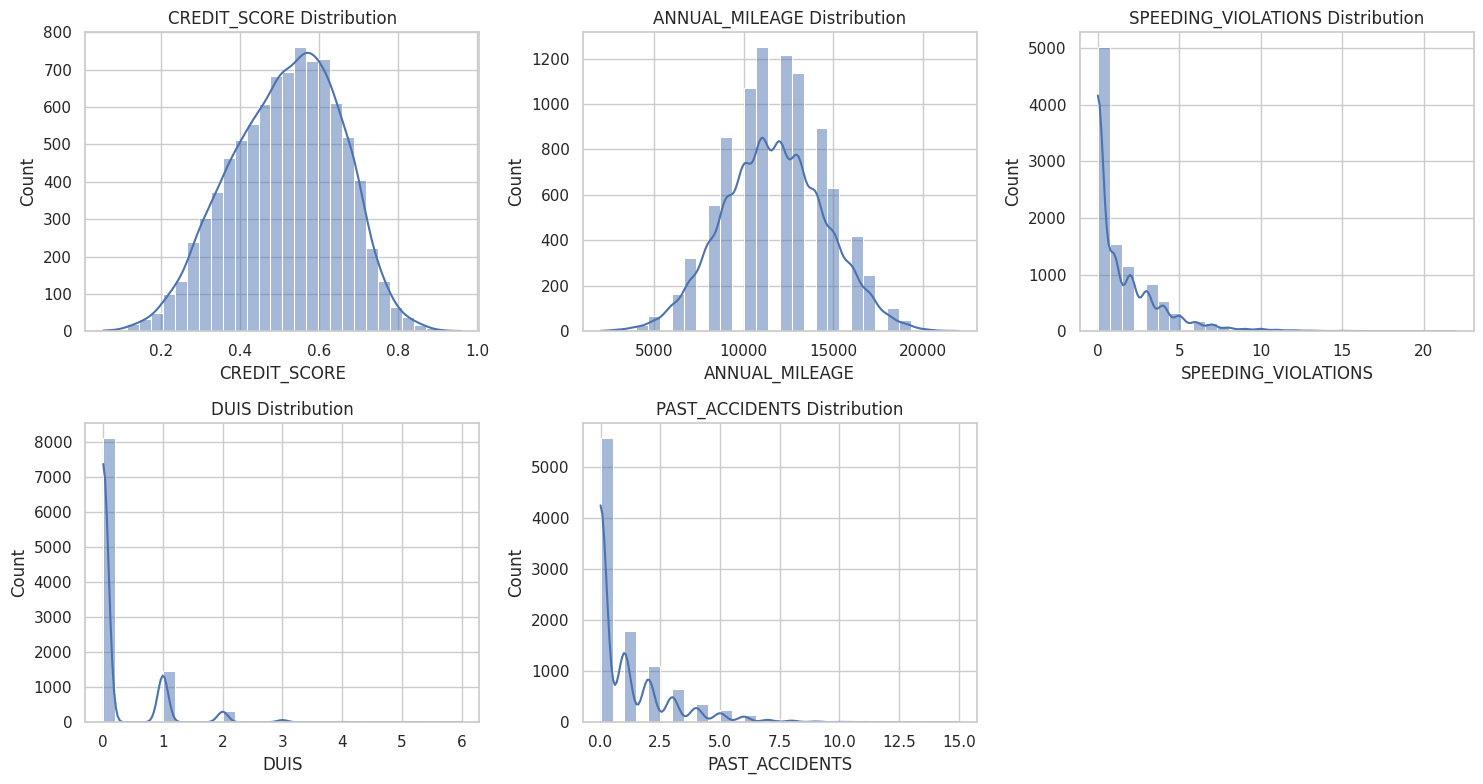

In [91]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical features
plt.figure(figsize=(15, 8))

# Histogram for CREDIT_SCORE
plt.subplot(2, 3, 1)
sns.histplot(df["CREDIT_SCORE"], kde=True, bins=30)
plt.title("CREDIT_SCORE Distribution")

# Histogram for ANNUAL_MILEAGE
plt.subplot(2, 3, 2)
sns.histplot(df["ANNUAL_MILEAGE"], kde=True, bins=30)
plt.title("ANNUAL_MILEAGE Distribution")

# Histogram for SPEEDING_VIOLATIONS
plt.subplot(2, 3, 3)
sns.histplot(df["SPEEDING_VIOLATIONS"], kde=True, bins=30)
plt.title("SPEEDING_VIOLATIONS Distribution")

# Histogram for DUIS
plt.subplot(2, 3, 4)
sns.histplot(df["DUIS"], kde=True, bins=30)
plt.title("DUIS Distribution")

# Histogram for PAST_ACCIDENTS
plt.subplot(2, 3, 5)
sns.histplot(df["PAST_ACCIDENTS"], kde=True, bins=30)
plt.title("PAST_ACCIDENTS Distribution")

plt.tight_layout()
plt.show()

##### Analysis of Categorical Features

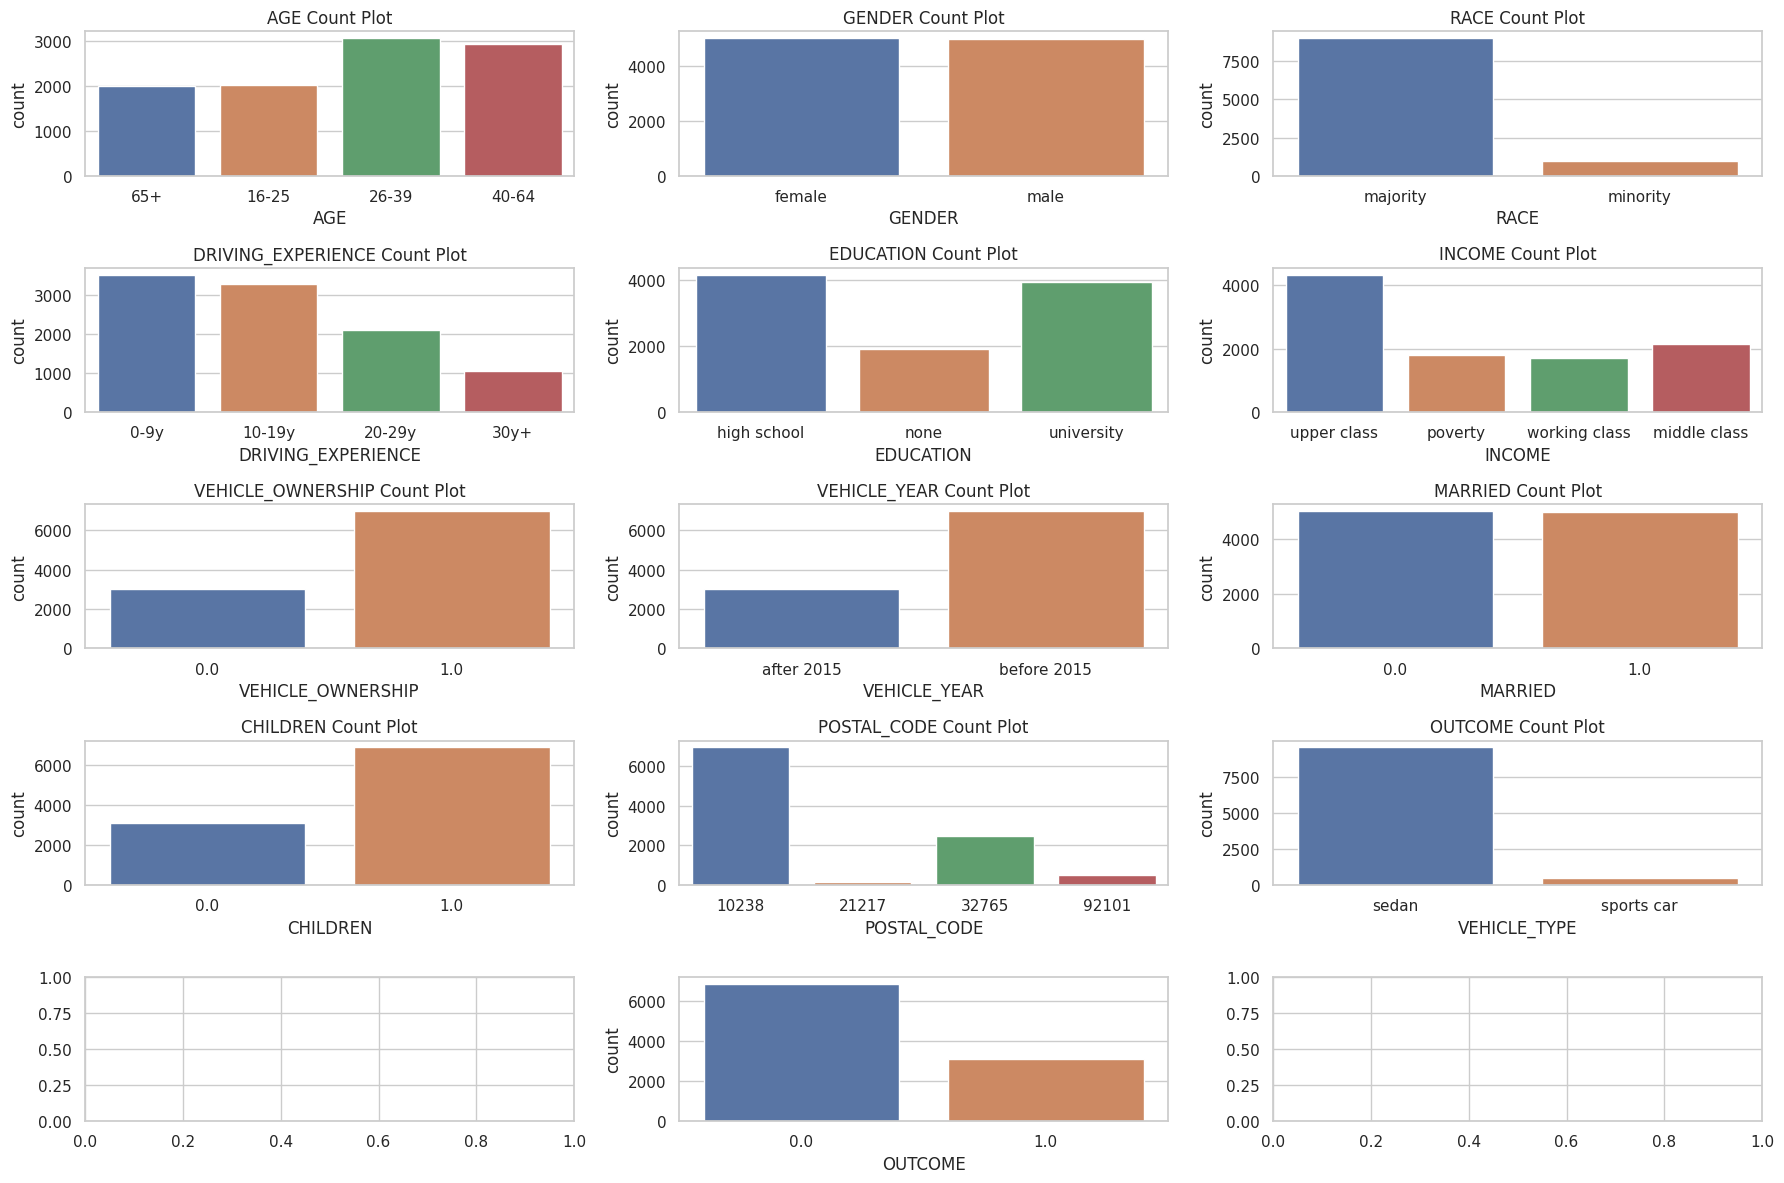

In [92]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting count plots for categorical features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))

# Count plot for AGE
sns.countplot(x="AGE", data=df, ax=axes[0, 0])
axes[0, 0].set_title("AGE Count Plot")

# Count plot for GENDER
sns.countplot(x="GENDER", data=df, ax=axes[0, 1])
axes[0, 1].set_title("GENDER Count Plot")

# Count plot for RACE
sns.countplot(x="RACE", data=df, ax=axes[0, 2])
axes[0, 2].set_title("RACE Count Plot")

# Count plot for DRIVING_EXPERIENCE
sns.countplot(x="DRIVING_EXPERIENCE", data=df, ax=axes[1, 0])
axes[1, 0].set_title("DRIVING_EXPERIENCE Count Plot")

# Count plot for EDUCATION
sns.countplot(x="EDUCATION", data=df, ax=axes[1, 1])
axes[1, 1].set_title("EDUCATION Count Plot")

# Count plot for INCOME
sns.countplot(x="INCOME", data=df, ax=axes[1, 2])
axes[1, 2].set_title("INCOME Count Plot")

# Count plot for VEHICLE_OWNERSHIP
sns.countplot(x="VEHICLE_OWNERSHIP", data=df, ax=axes[2, 0])
axes[2, 0].set_title("VEHICLE_OWNERSHIP Count Plot")

# Count plot for VEHICLE_YEAR
sns.countplot(x="VEHICLE_YEAR", data=df, ax=axes[2, 1])
axes[2, 1].set_title("VEHICLE_YEAR Count Plot")

# Count plot for MARRIED
sns.countplot(x="MARRIED", data=df, ax=axes[2, 2])
axes[2, 2].set_title("MARRIED Count Plot")

# Count plot for CHILDREN
sns.countplot(x="CHILDREN", data=df, ax=axes[3, 0])
axes[3, 0].set_title("CHILDREN Count Plot")

# Count plot for POSTAL_CODE
sns.countplot(x="POSTAL_CODE", data=df, ax=axes[3, 1])
axes[3, 1].set_title("POSTAL_CODE Count Plot")

# Count plot for VEHICLE_TYPE
sns.countplot(x="VEHICLE_TYPE", data=df, ax=axes[3, 2])
axes[3, 2].set_title("VEHICLE_TYPE Count Plot")

# Count plot for OUTCOME
sns.countplot(x="OUTCOME", data=df, ax=axes[4, 1])
axes[3, 2].set_title("OUTCOME Count Plot")

plt.tight_layout()
plt.show()

#### Bivariate Analysis

##### Numerical Features vs Outcome

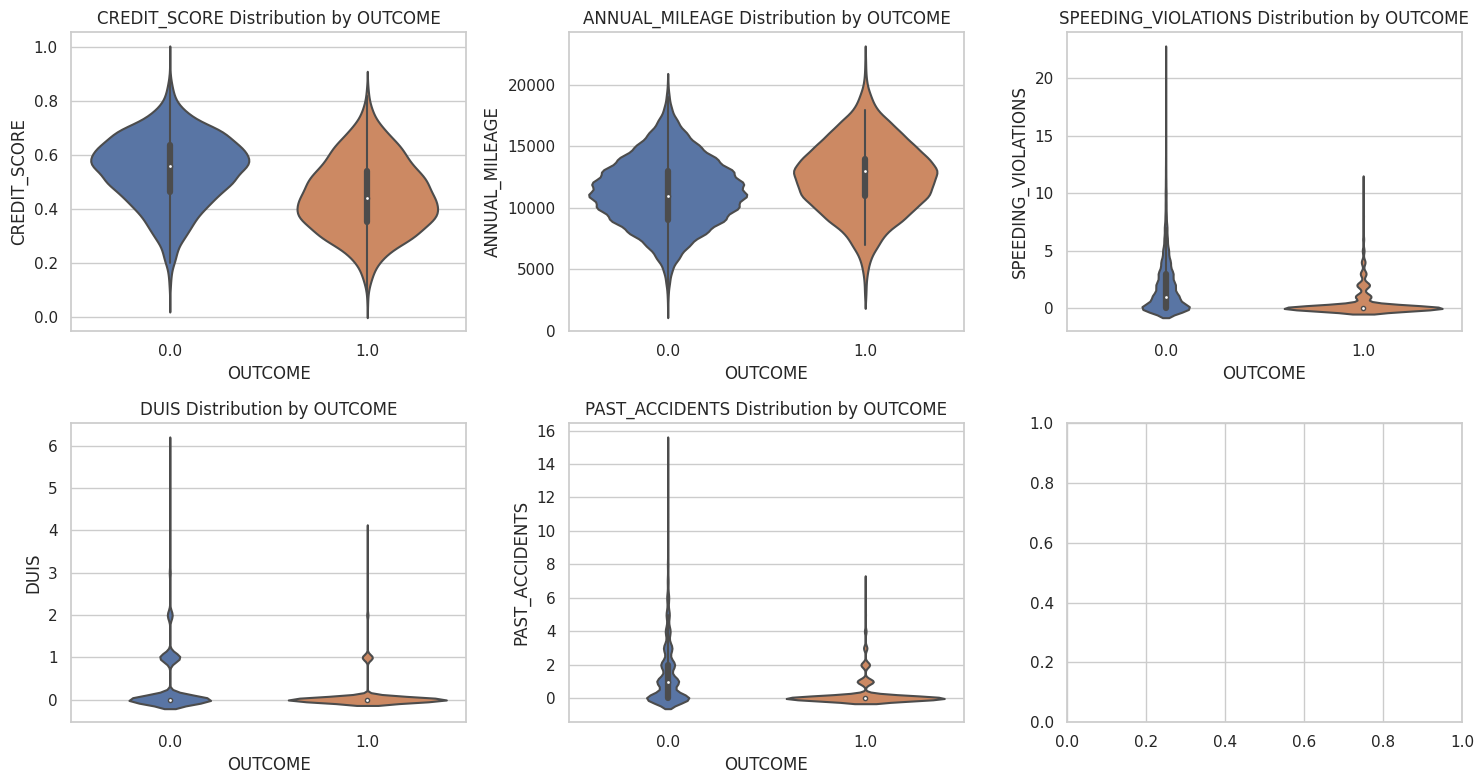

In [93]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting violin plots for numerical features with the categorical variable OUTCOME
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

numerical_features = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.violinplot(x='OUTCOME', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution by OUTCOME')

plt.tight_layout()
plt.show()

##### Categorical Features

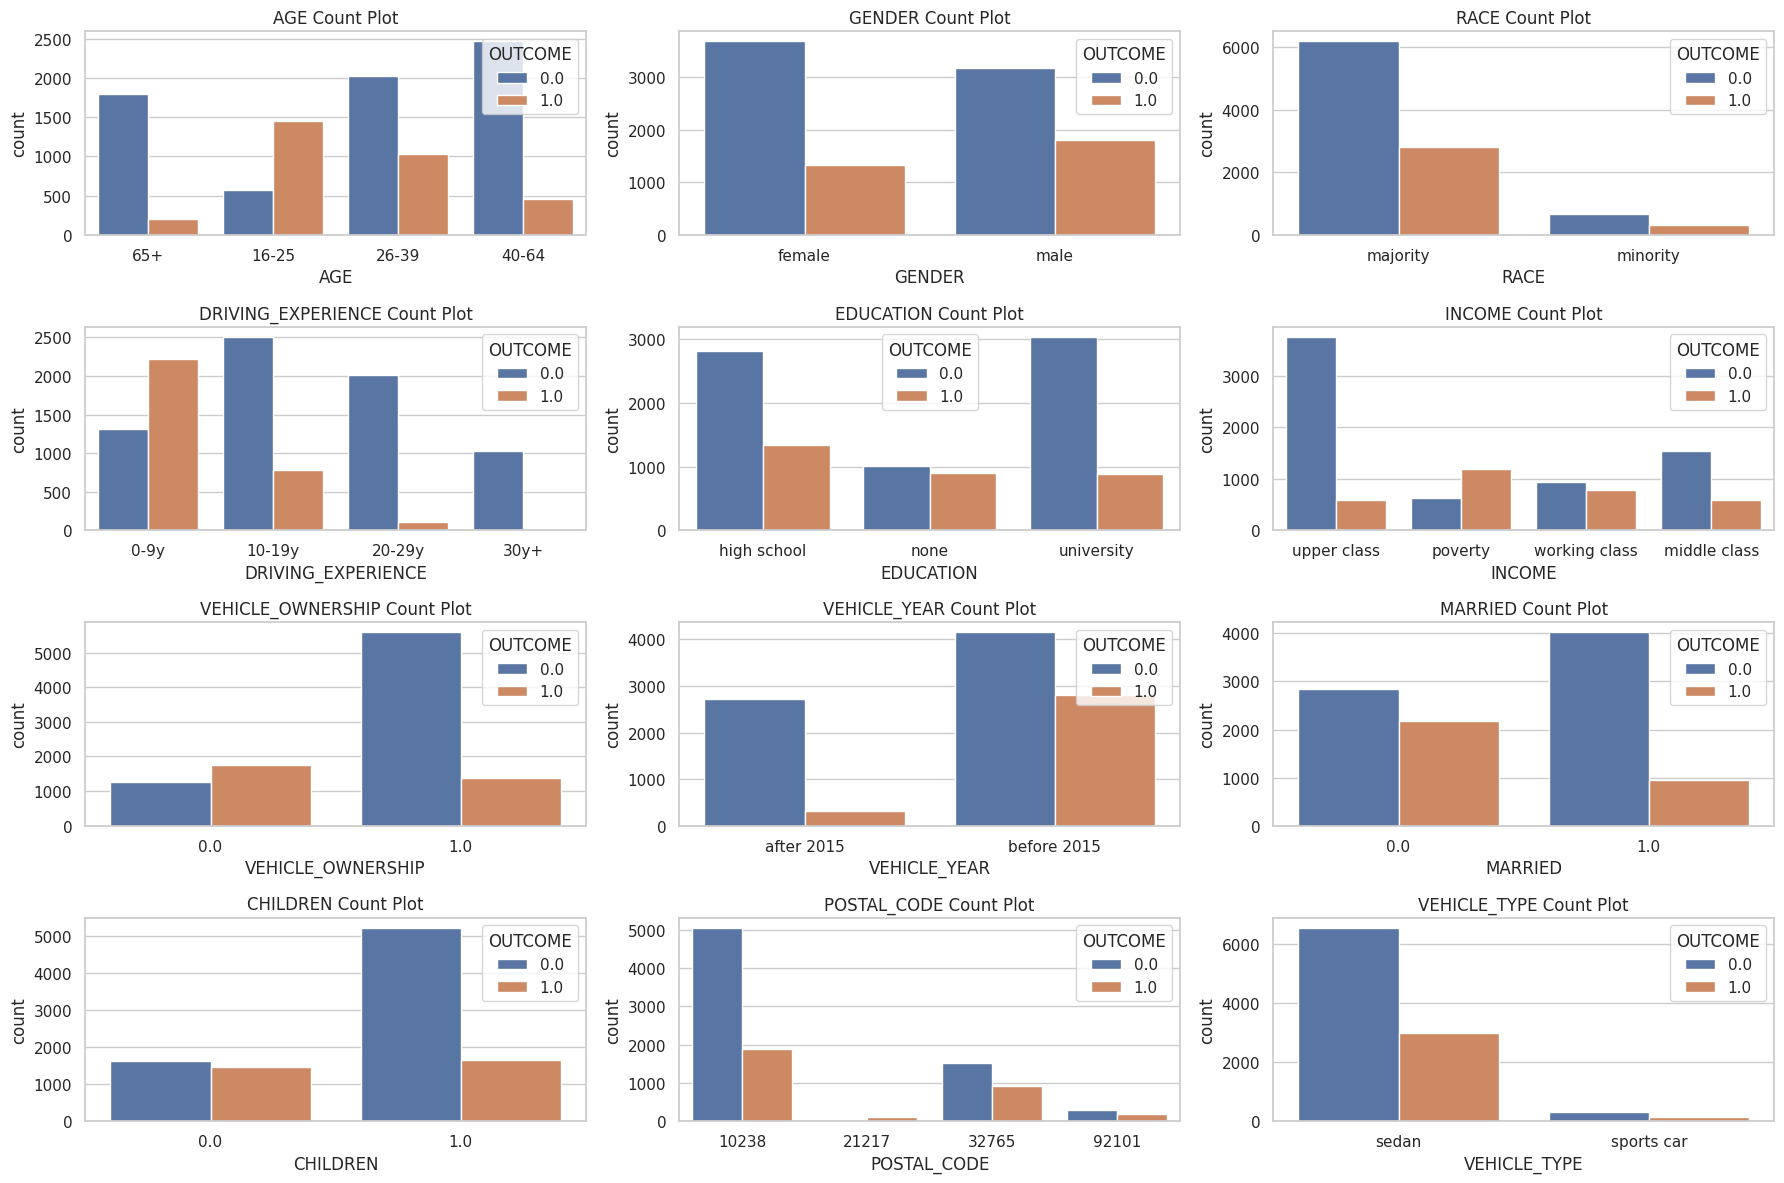

In [94]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting count plots for relationships between categorical features and OUTCOME
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))

# Count plot for AGE
sns.countplot(x="AGE", data=df, ax=axes[0, 0], hue='OUTCOME')
axes[0, 0].set_title("AGE Count Plot")

# Count plot for GENDER
sns.countplot(x="GENDER", data=df, ax=axes[0, 1], hue='OUTCOME')
axes[0, 1].set_title("GENDER Count Plot")

# Count plot for RACE
sns.countplot(x="RACE", data=df, ax=axes[0, 2], hue='OUTCOME')
axes[0, 2].set_title("RACE Count Plot")

# Count plot for DRIVING_EXPERIENCE
sns.countplot(x="DRIVING_EXPERIENCE", data=df, ax=axes[1, 0], hue='OUTCOME')
axes[1, 0].set_title("DRIVING_EXPERIENCE Count Plot")

# Count plot for EDUCATION
sns.countplot(x="EDUCATION", data=df, ax=axes[1, 1], hue='OUTCOME')
axes[1, 1].set_title("EDUCATION Count Plot")

# Count plot for INCOME
sns.countplot(x="INCOME", data=df, ax=axes[1, 2], hue='OUTCOME')
axes[1, 2].set_title("INCOME Count Plot")

# Count plot for VEHICLE_OWNERSHIP
sns.countplot(x="VEHICLE_OWNERSHIP", data=df, ax=axes[2, 0], hue='OUTCOME')
axes[2, 0].set_title("VEHICLE_OWNERSHIP Count Plot")

# Count plot for VEHICLE_YEAR
sns.countplot(x="VEHICLE_YEAR", data=df, ax=axes[2, 1], hue='OUTCOME')
axes[2, 1].set_title("VEHICLE_YEAR Count Plot")

# Count plot for MARRIED
sns.countplot(x="MARRIED", data=df, ax=axes[2, 2], hue='OUTCOME')
axes[2, 2].set_title("MARRIED Count Plot")

# Count plot for CHILDREN
sns.countplot(x="CHILDREN", data=df, ax=axes[3, 0], hue='OUTCOME')
axes[3, 0].set_title("CHILDREN Count Plot")

# Count plot for POSTAL_CODE
sns.countplot(x="POSTAL_CODE", data=df, ax=axes[3, 1], hue='OUTCOME')
axes[3, 1].set_title("POSTAL_CODE Count Plot")

# Count plot for VEHICLE_TYPE
sns.countplot(x="VEHICLE_TYPE", data=df, ax=axes[3, 2], hue='OUTCOME')
axes[3, 2].set_title("VEHICLE_TYPE Count Plot")

plt.tight_layout()
plt.show()

## Feature Engineering

**Some considerations**

* Missing values for 'CREDIT_SCORE' and "ANNUAL_MILEAGE'

* There are multiple categorical features: 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'VEHICLE_TYPE'.

* There are multiple numerical features: 'CREDIT_SCORE', 'ANNUAL_MILEAGE','SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'.

* The ID is simply an identifier that can be removed.

### Drop unnecessary features: ID

In [95]:
# We can safely remove the ID attributes since it gives us no information.
df.drop("ID", axis=1, inplace=True)

### Fill na: using k-nearest neighbors (KNN)

In [96]:
df_imputed = df.copy() # create df coppy

columns_to_impute = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the specified columns
df_imputed[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Check if there are any remaining missing values
remaining_missing_values = df_imputed[columns_to_impute].isnull().sum()
print("Remaining missing values after imputation:")
print(remaining_missing_values)

Remaining missing values after imputation:
CREDIT_SCORE      0
ANNUAL_MILEAGE    0
dtype: int64


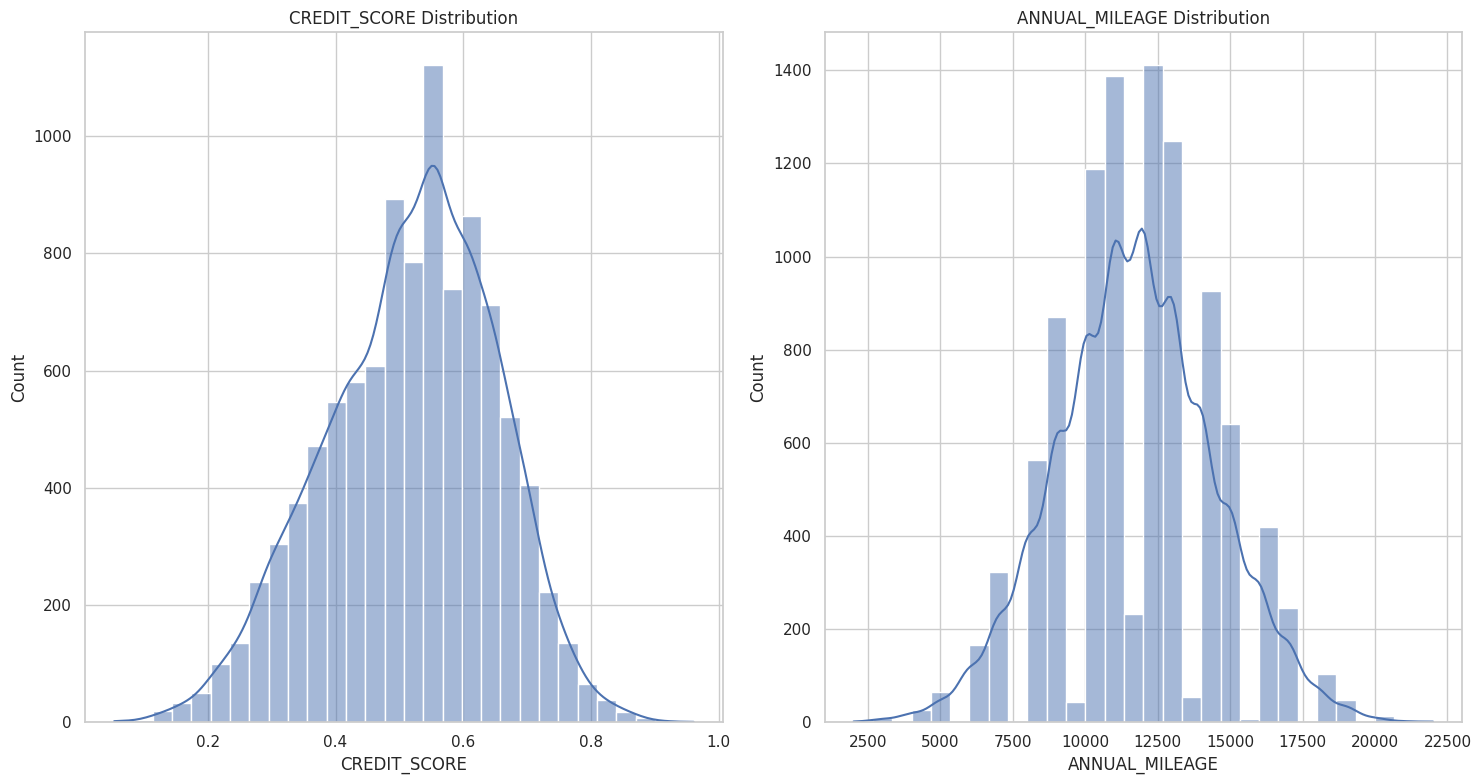

In [97]:
# Distribution after filling na

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical features
plt.figure(figsize=(15, 8))

# Histogram for CREDIT_SCORE
plt.subplot(1, 2, 1)  # Corrected subplot index
sns.histplot(df_imputed["CREDIT_SCORE"], kde=True, bins=30)
plt.title("CREDIT_SCORE Distribution")

# Histogram for ANNUAL_MILEAGE
plt.subplot(1, 2, 2)  # Corrected subplot index
sns.histplot(df_imputed["ANNUAL_MILEAGE"], kde=True, bins=30)
plt.title("ANNUAL_MILEAGE Distribution")

plt.tight_layout()  # Added to adjust subplot parameters for better layout
plt.show()

### Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded
columns_to_encode = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_TYPE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'OUTCOME']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display the updated DataFrame
print(df_imputed.head())

   AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     0                   0          0       2      0.629027   
1    0       1     0                   0          1       1      0.357757   
2    0       0     0                   0          0       3      0.493146   
3    0       1     0                   0          2       3      0.206013   
4    1       1     0                   1          1       3      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  1             0        0         1            0   
1                  0             1        0         0            0   
2                  1             1        0         0            0   
3                  1             1        0         1            2   
4                  1             1        0         0            2   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0         12000.0             0       

# Goal #2: Build a classification model!

## Splitting the Dataset into Train and Test Set 🔪

In [99]:
from sklearn.model_selection import train_test_split

X = df_imputed.drop('OUTCOME', axis=1)
y = df_imputed['OUTCOME']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## Feature Selection based on correlation

In [100]:
# Feature Selection based on correlation
df.corr()

<ipython-input-100-9cc02e7b2949>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.325286,-0.378921,-0.262104,-0.232835,0.095889,0.187154,-0.291862,-0.189352,-0.311495,1.000000


## Multicolllinearity

In [101]:
corr = X_train.corr()
corr

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
AGE,1.000000,0.000468,-0.006981,0.709121,0.159145,0.142739,0.472940,0.271994,-0.236276,0.387335,0.383993,0.006448,-0.268061,-0.006879,0.457642,0.283379,0.430355
GENDER,0.000468,1.000000,-0.002396,0.011804,0.080387,0.015946,-0.081318,0.009161,-0.003608,0.005245,-0.010921,0.000557,-0.018184,0.005953,0.204103,0.098131,0.227080
RACE,-0.006981,-0.002396,1.000000,-0.021060,-0.041117,0.003815,-0.029629,-0.030481,0.018151,-0.016321,0.012562,-0.000776,-0.001574,0.013967,-0.019716,-0.011228,-0.008169
DRIVING_EXPERIENCE,0.709121,0.011804,-0.021060,1.000000,0.101911,0.085429,0.332676,0.195484,-0.161501,0.271434,0.282237,0.002586,-0.183300,-0.004283,0.636285,0.397986,0.601643
EDUCATION,0.159145,0.080387,-0.041117,0.101911,1.000000,0.079342,0.210644,0.121875,-0.117026,0.100749,0.074106,0.015308,-0.066951,-0.000248,0.090032,0.052178,0.070427
INCOME,0.142739,0.015946,0.003815,0.085429,0.079342,1.000000,0.092901,0.050164,-0.077787,0.067321,0.051048,0.017692,-0.058164,-0.017454,0.057127,0.060202,0.054857
CREDIT_SCORE,0.472940,-0.081318,-0.029629,0.332676,0.210644,0.092901,1.000000,0.289036,-0.252269,0.274643,0.217460,0.018408,-0.189766,-0.005468,0.202637,0.122216,0.173189
VEHICLE_OWNERSHIP,0.271994,0.009161,-0.030481,0.195484,0.121875,0.050164,0.289036,1.000000,-0.154651,0.172512,0.123328,0.005120,-0.093184,0.009924,0.132525,0.084919,0.111110
VEHICLE_YEAR,-0.236276,-0.003608,0.018151,-0.161501,-0.117026,-0.077787,-0.252269,-0.154651,1.000000,-0.130142,-0.110432,-0.001146,0.070593,0.024600,-0.095711,-0.048585,-0.098330
MARRIED,0.387335,0.005245,-0.016321,0.271434,0.100749,0.067321,0.274643,0.172512,-0.130142,1.000000,0.296719,0.009238,-0.448093,0.012717,0.220406,0.126176,0.212140


<Axes: >

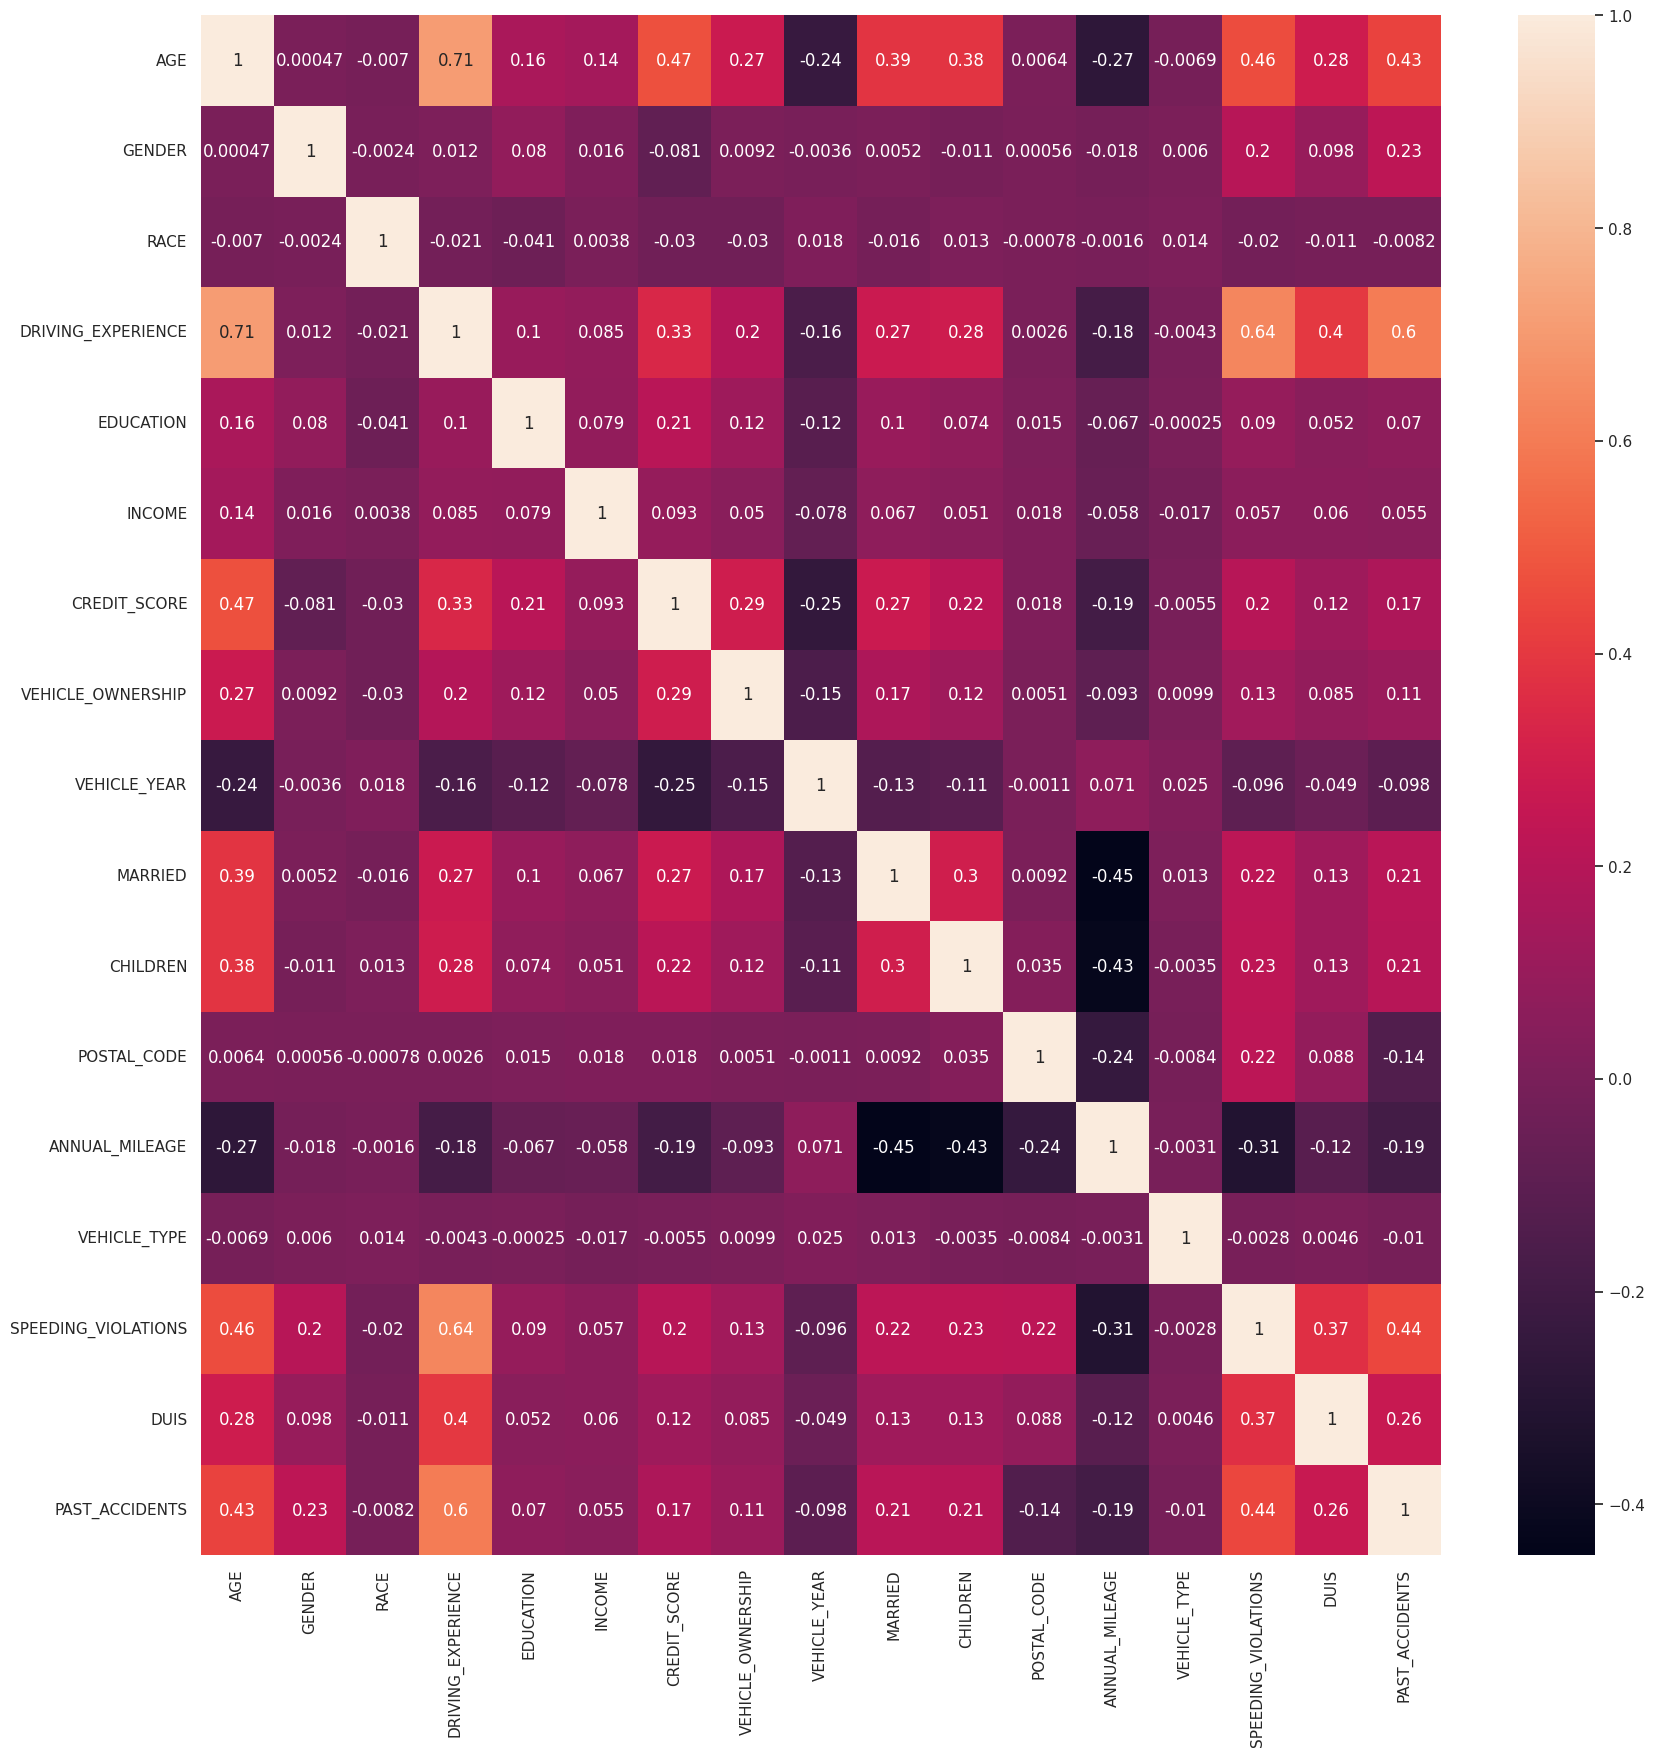

In [103]:
# Visualiza correlation and check for multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [104]:
# This function helps in identifying and potentially removing features that are highly correlated,
# thereby reducing multicollinearity, which can affect the performance of certain types of models.
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [105]:
## threshold--Domain expertise
corr_features=correlation(X_train, 0.85)

In [106]:
corr_features

set()

In [107]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((8000, 17), (2000, 17))

## Scaling

In [108]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

print(X_train[:5])
print(y_train[:5])

[[ 1.46847582  1.00300451 -0.32774947  0.9355964   1.14191024  0.42964231
   0.26532112 -1.51354776 -1.51848119  1.00175153  0.67478832  1.35386061
  -1.73109783 -0.22362147  3.34288335 -0.42709163 -0.03423076]
 [ 0.4937159   1.00300451 -0.32774947  0.9355964   0.02812312 -0.56231685
  -0.70052835 -1.51354776  0.65855277 -0.99825153  0.67478832 -0.64316804
   0.10896922  4.4718425   1.11815065  1.38742405 -0.63609022]
 [ 0.4937159  -0.99700449 -0.32774947  0.9355964  -1.08566399  1.42160148
  -0.64514883  0.66069934  0.65855277  1.00175153  0.67478832 -0.64316804
  -0.25904419 -0.22362147 -0.6616355  -0.42709163 -0.03423076]
 [-1.45580394  1.00300451 -0.32774947 -1.07968933  1.14191024  1.42160148
  -0.89662099 -1.51354776  0.65855277 -0.99825153 -1.48194622 -0.64316804
   1.21300945 -0.22362147 -0.6616355  -0.42709163 -0.63609022]
 [ 1.46847582  1.00300451 -0.32774947  1.94323926  1.14191024  0.42964231
   0.5959733   0.66069934  0.65855277  1.00175153 -1.48194622 -0.64316804
   1.213

## Train

Since predictors are not normal distributed, we should use Logistic Regression or Decision Tree or Random Forest methods instead of LDA or QDA.

Small dataset (10,000 observations), choose logistic regression.

In [109]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Access coefficients and intercept
coefficients = logreg_model.coef_
intercept = logreg_model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.00290143  0.50263463 -0.03746166 -1.6816148   0.02874815  0.02764183
  -0.02944329 -0.79329444  0.79563293 -0.19238596 -0.0430035   0.5349164
   0.29485086  0.01046077  0.01611637  0.01542047 -0.18092159]]
Intercept: [-1.67512604]


## Model Evaluation

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8425
Confusion Matrix:
 [[1242  139]
 [ 176  443]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1381
           1       0.76      0.72      0.74       619

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000



1. Accuracy: The model is about 84.25% accurate in predicting both classes.

2. The confusion matrix provides a breakdown of correct and incorrect predictions:
* 1,242 instances were correctly classified as class 0 (true negatives).
* 443 instances were correctly classified as class 1 (true positives).
* 176 instances were incorrectly classified as class 1 when they were actually class 0 (false positives).
139 instances were incorrectly classified as class 0 when they were actually class 1 (false negatives).

3. Precision:
* For class 0 (negative), the precision is high (0.88), indicating that when the model predicts a customer won't churn, it is correct 88% of the time.
* For class 1 (positive), the precision is moderate (0.76), indicating that when the model predicts a customer will churn, it is correct 76% of the time.

4. Recall:
* For class 0, the recall is high (0.90), meaning the model correctly identifies 90% of actual non-churn instances.
* For class 1, the recall is moderate (0.72), indicating that the model captures 72% of actual churn instances.

5. F1-Score: The F1-score is the harmonic mean of precision and recall. It is a single metric that balances precision and recall. The F1-Score for both classes is reasonable, with class 0 having a higher score (0.89) than class 1 (0.74).


Overall, the model seems to perform reasonably well with a good accuracy. The model appears to be better at predicting class 0 (higher precision and recall) compared to class 1.

Further analysis and fine-tuning of the model may be needed to optimize its performance based on specific business objectives.

## Fine-tuning

In [111]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create the logistic regression model
logreg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', verbose=1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

# Create a logistic regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42)

# Train the model on your training data
best_logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)

# Evaluate the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1244  137]
 [ 173  446]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1381
           1       0.77      0.72      0.74       619

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.82      2000
weighted avg       0.84      0.84      0.84      2000



The new results after fine-tuning the logistic regression model are indeed quite similar to the previous results. Both sets of results have an accuracy of 84%, and the precision, recall, and F1-score values also show minimal differences.

1. Precision: When the model predicts a positive outcome (1), it is correct about 77% of the time.

2. Recall (Sensitivity): The model's ability to identify all relevant instances of the positive class. Here, the recall for class 1 is 72%.

3. F1-Score:
* Class 0 (Negative): 0.89 (Good balance between true negatives and avoiding false positives/negatives).
* Class 1 (Positive): 0.74 (Slightly lower balance, with potential trade-off between precision and recall).

4. Accuracy: The overall accuracy of the model is 84%, indicating the percentage of correct predictions over all predictions.

5. Confusion Matrix: There are 1244 true negatives (TN), 137 false positives (FP), 173 false negatives (FN), and 446 true positives (TP).

Given the ultimate goal of predicting whether a customer is likely to claim car insurance or not, the model performance, especially in predicting the positive class (1), is crucial. However, the model seems effective in predicting customers who are less likely to claim insurance (Class 0).

# Goal #3 Summarize findings

# The challenges faced during the steps and proposing potential improvements

1. Data Quality:

* Challenge: Addressing missing values in CREDIT_SCORE and ANNUAL_MILEAGE.
* Improvement: Explore different imputation methods or consider excluding rows.

2. Data Exploration and Visualization:

* Challenge: Understanding relationships between variables and OUTCOME.
* Improvement: Utilize more visualization techniques, such as statistical tests to uncover patterns.

3. Model Selection and Tuning:
* Challenge: Limited improvement with hyperparameter tuning.
* Improvement: Explore more sophisticated algorithms, ensemble methods.

4. Threshold Adjustment:
* Challenge: Difficulty in improving class 1 prediction.
* Improvement: Explore different threshold adjustment techniques to find an optimal threshold.